# Влияние функций активации на классификацию

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random as python_random

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Домашнее задание

In [3]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
Y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

In [5]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
train_images.shape, train_labels.shape

((940, 20, 16), (940,))

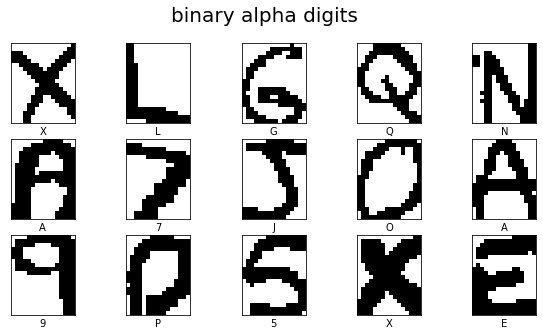

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
hstr = model.fit(train_images, train_labels, epochs=15, verbose=2, validation_data = (test_images, test_labels))

Epoch 1/15
30/30 - 2s - loss: 3.1427 - accuracy: 0.2138 - val_loss: 2.3284 - val_accuracy: 0.3944 - 2s/epoch - 60ms/step
Epoch 2/15
30/30 - 0s - loss: 1.5285 - accuracy: 0.5734 - val_loss: 1.4780 - val_accuracy: 0.5409 - 235ms/epoch - 8ms/step
Epoch 3/15
30/30 - 0s - loss: 0.9098 - accuracy: 0.7330 - val_loss: 1.2242 - val_accuracy: 0.6164 - 197ms/epoch - 7ms/step
Epoch 4/15
30/30 - 0s - loss: 0.5803 - accuracy: 0.8362 - val_loss: 1.0874 - val_accuracy: 0.6530 - 196ms/epoch - 7ms/step
Epoch 5/15
30/30 - 0s - loss: 0.4334 - accuracy: 0.8713 - val_loss: 1.1491 - val_accuracy: 0.6638 - 156ms/epoch - 5ms/step
Epoch 6/15
30/30 - 0s - loss: 0.3638 - accuracy: 0.8915 - val_loss: 1.1733 - val_accuracy: 0.6616 - 149ms/epoch - 5ms/step
Epoch 7/15
30/30 - 0s - loss: 0.2423 - accuracy: 0.9255 - val_loss: 1.0679 - val_accuracy: 0.6875 - 193ms/epoch - 6ms/step
Epoch 8/15
30/30 - 0s - loss: 0.1871 - accuracy: 0.9383 - val_loss: 1.1867 - val_accuracy: 0.6616 - 162ms/epoch - 5ms/step
Epoch 9/15
30/30 -

Epoch 15/15 \
30/30 - 0s - loss: 0.1012 - accuracy: 0.9734 - 55ms/epoch - 2ms/step \
 \
Epoch 15/15 \
30/30 - 0s - loss: 0.0592 - accuracy: 0.9798 - 89ms/epoch - 3ms/step

In [11]:
model.predict(test_images)

15/15 [==============================] - 0s 3ms/step


array([[  3.4567084 ,  -4.052895  ,  -8.327409  , ...,  -9.006082  ,
         -7.557264  ,  -9.140453  ],
       [ -9.632445  ,  -0.44835266,  -2.6133897 , ...,  -1.9046044 ,
         -8.64703   ,  -2.3303893 ],
       [ -9.826165  ,   2.9224517 ,  -5.648726  , ...,  -1.4354885 ,
        -14.257832  , -11.573389  ],
       ...,
       [-11.224971  ,  -1.9618633 ,  -7.611831  , ...,   0.88403475,
         -1.7328535 , -11.450267  ],
       [ -4.0836353 ,  -0.5047804 ,  -2.9756396 , ...,  -8.297554  ,
        -13.386838  ,  -5.123405  ],
       [ -2.3716896 ,  -4.0566225 ,  -5.249615  , ...,  -4.9349594 ,
         -6.374615  ,  -5.791465  ]], dtype=float32)

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

15/15 [==============================] - 0s 3ms/step


In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                  100*np.max(predictions_array),
                                  classes[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(36))
    plt.yticks([])
    thisplot = plt.bar(range(36), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

(20, 16)
(1, 20, 16)
1/1 [==============================] - 0s 22ms/step
[[3.3226016e-11 1.1432224e-05 2.1662829e-09 3.1252534e-13 9.9222118e-01
  1.3367502e-10 7.5024171e-03 1.4332613e-11 1.5094081e-08 3.8428496e-14
  1.9344917e-08 1.3351760e-07 3.0697481e-10 4.0820596e-09 5.3131033e-09
  2.8230561e-08 6.9974907e-05 2.3101485e-08 9.0082830e-11 4.7341536e-12
  3.8774183e-06 1.2936028e-04 7.0722810e-09 9.9442395e-06 2.3502134e-09
  5.3202143e-12 7.1831874e-09 3.8567856e-07 2.3157533e-10 2.5022039e-13
  3.8496168e-05 4.6000839e-08 1.2371617e-05 1.4638653e-07 3.9521226e-13
  5.7898391e-12]]


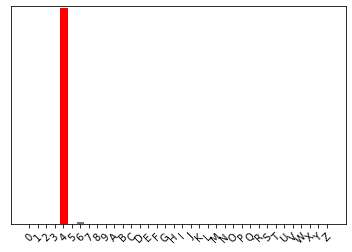

In [14]:
img = test_images[2]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(36), classes, rotation=45)

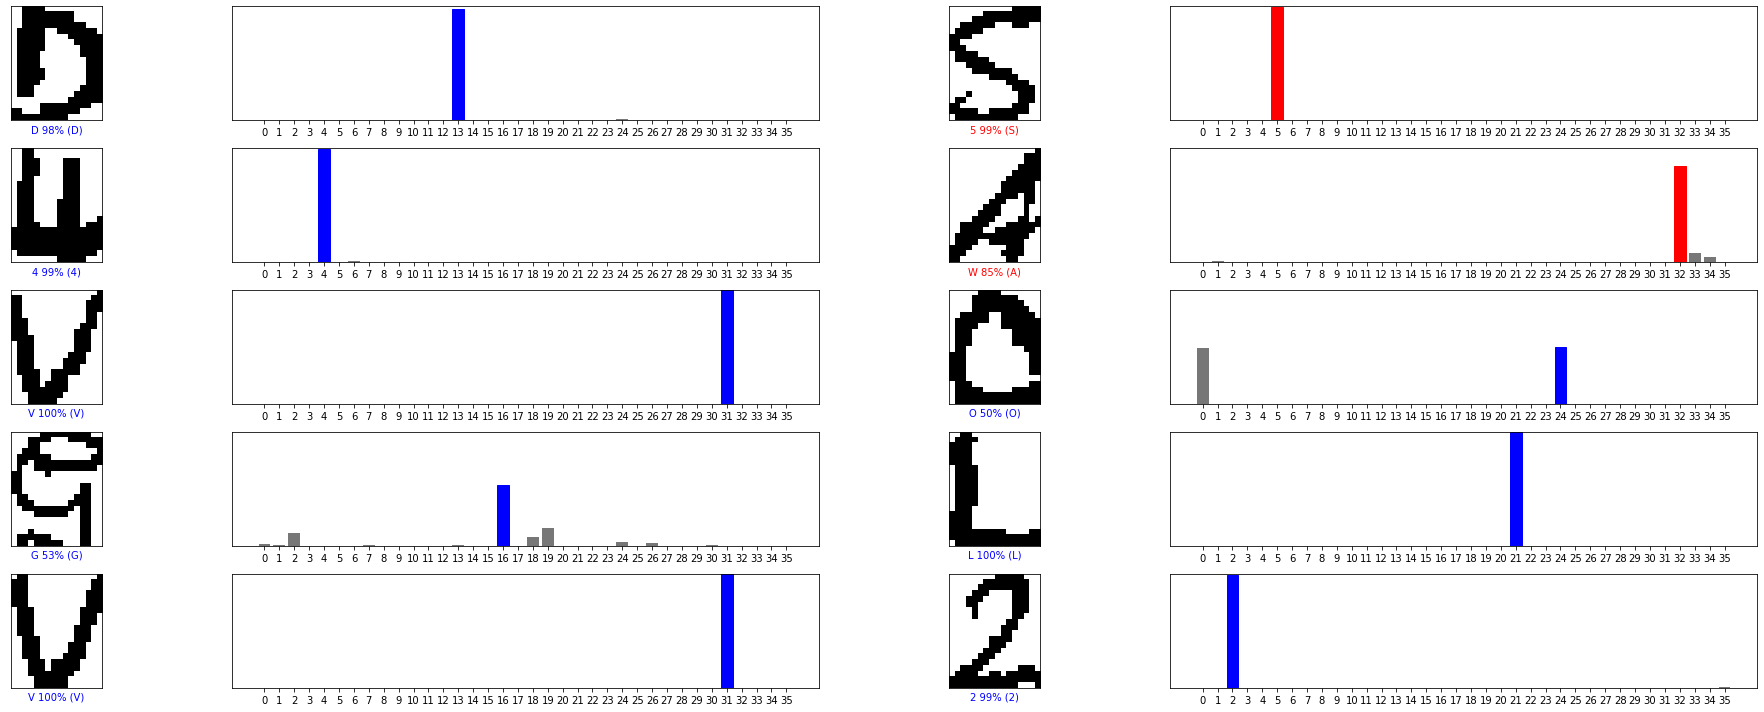

In [15]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(7*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Я пробовал по разному менять параметры модели, но ошибки устойчиво возникают в схожих местах. Часто путаются 0 и о, 5 и s. Буква g из-за своего сложного написания вообще с трудом распознается моделью. Я думаю для идеального распознования нужен больший датасет.  